In [18]:
from keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np
from google.colab.patches import cv2_imshow

In [19]:
# Load the model
model = load_model("keras_model.h5", compile=False)

In [20]:
# Load the labels
class_names = open("labels.txt", "r").readlines()

In [28]:
image = cv2.imread('no_mask_0.jpg')

In [29]:
 # Resize the raw image into (224-height,224-width) pixels
image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

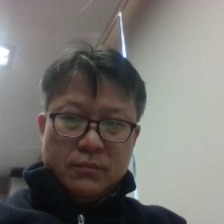

In [30]:
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
# Make the image a numpy array and reshape it to the models input shape.
image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)

# Normalize the image array
image = (image / 127.5) - 1

In [32]:
# Predicts the model
prediction = model.predict(image)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

1/1 [==============================] - 0s 40ms/step


In [33]:
# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", str(np.round(confidence_score * 100))[:-2], "%")

Class: Class 2
Confidence Score: 98 %
